In [1]:
from keras.datasets import boston_housing
(train_data,train_targets), (test_data, test_targets)=  boston_housing.load_data()

train_data.shape #(404, 13)
test_data.shape#(102, 13)
train_targets.shape #(404,)
test_targets.shape #(102,)

Using TensorFlow backend.


(102,)

In [2]:
train_data.shape

(404, 13)

In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_data=sc.fit_transform(train_data)
test_data= sc.transform(test_data)

In [4]:
from keras import models
from keras import layers
from keras import optimizers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['mae'])
    return model

## K fold validation(only for tiny dataset)

In [5]:
import numpy as np
k=4

num_val_samples= len(train_data)// k
num_epochs=100
all_scores=[]

for i in range(k):
    print('processing fold # {}'.format(i))
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model=build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=10)
    
    val_mse,val_mae= model.evaluate(val_data,val_targets,verbose=0)
    #the second value will be val_mae becoz you use the mae in your metrics
    
    all_scores.append(val_mae)

processing fold # 0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
303/303 [==============================] - 2s 5ms/step - loss: 495.3933 - mean_absolute_error: 20.3055
Epoch 2/100
303/303 [==============================] - 0s 228us/step - loss: 302.4680 - mean_absolute_error: 15.1025
Epoch 3/100
303/303 [==============================] - 0s 244us/step - loss: 125.7181 - mean_absolute_error: 8.9411
Epoch 4/100
303/303 [==============================] - 0s 235us/step - loss: 57.7625 - mean_absolute_error: 5.7193
Epoch 5/100
303/303 [==============================] - 0s 241us/step - loss: 37.6532 - mean_absolute_error: 4.5430
Epoch 6/100
303/303 [==============================] - 0s 248us/step - loss: 28.0669 - mean_absolute_error: 3.8895
Epoch 7/100
303/303 [==============================] - 0s 225us/step - loss: 23.7655 - mean_absolute_error: 3.4639
Epoch 8/100
303/303 [==============================]

303/303 [==============================] - 0s 261us/step - loss: 6.7637 - mean_absolute_error: 1.8248
Epoch 67/100
303/303 [==============================] - 0s 277us/step - loss: 6.6954 - mean_absolute_error: 1.7903
Epoch 68/100
303/303 [==============================] - 0s 264us/step - loss: 6.6262 - mean_absolute_error: 1.7691
Epoch 69/100
303/303 [==============================] - 0s 258us/step - loss: 6.8054 - mean_absolute_error: 1.7790
Epoch 70/100
303/303 [==============================] - 0s 248us/step - loss: 6.4796 - mean_absolute_error: 1.7527
Epoch 71/100
303/303 [==============================] - 0s 271us/step - loss: 6.5414 - mean_absolute_error: 1.7658
Epoch 72/100
303/303 [==============================] - 0s 261us/step - loss: 6.2606 - mean_absolute_error: 1.7282
Epoch 73/100
303/303 [==============================] - 0s 225us/step - loss: 6.4528 - mean_absolute_error: 1.7405
Epoch 74/100
303/303 [==============================] - 0s 205us/step - loss: 6.4826 - mean_a

303/303 [==============================] - 0s 268us/step - loss: 8.4497 - mean_absolute_error: 2.0162
Epoch 38/100
303/303 [==============================] - 0s 268us/step - loss: 8.2598 - mean_absolute_error: 1.9805
Epoch 39/100
303/303 [==============================] - 0s 301us/step - loss: 8.0931 - mean_absolute_error: 1.9791
Epoch 40/100
303/303 [==============================] - 0s 294us/step - loss: 8.2317 - mean_absolute_error: 1.9947
Epoch 41/100
303/303 [==============================] - 0s 261us/step - loss: 8.0532 - mean_absolute_error: 1.9482
Epoch 42/100
303/303 [==============================] - 0s 287us/step - loss: 8.1368 - mean_absolute_error: 1.9298
Epoch 43/100
303/303 [==============================] - 0s 297us/step - loss: 7.8805 - mean_absolute_error: 1.9432
Epoch 44/100
303/303 [==============================] - 0s 297us/step - loss: 7.9696 - mean_absolute_error: 1.9697
Epoch 45/100
303/303 [==============================] - 0s 291us/step - loss: 7.6261 - mean_a

303/303 [==============================] - 0s 281us/step - loss: 21.6155 - mean_absolute_error: 3.3335
Epoch 8/100
303/303 [==============================] - 0s 258us/step - loss: 19.1884 - mean_absolute_error: 3.1645
Epoch 9/100
303/303 [==============================] - 0s 248us/step - loss: 17.5055 - mean_absolute_error: 3.0009
Epoch 10/100
303/303 [==============================] - 0s 284us/step - loss: 15.6347 - mean_absolute_error: 2.8413
Epoch 11/100
303/303 [==============================] - 0s 251us/step - loss: 14.5494 - mean_absolute_error: 2.7731
Epoch 12/100
303/303 [==============================] - 0s 244us/step - loss: 13.3336 - mean_absolute_error: 2.7092
Epoch 13/100
303/303 [==============================] - 0s 225us/step - loss: 12.4614 - mean_absolute_error: 2.5854
Epoch 14/100
303/303 [==============================] - 0s 228us/step - loss: 11.8600 - mean_absolute_error: 2.5245
Epoch 15/100
303/303 [==============================] - 0s 225us/step - loss: 11.2785 -

303/303 [==============================] - 0s 241us/step - loss: 4.9944 - mean_absolute_error: 1.6265
Epoch 78/100
303/303 [==============================] - 0s 238us/step - loss: 4.9270 - mean_absolute_error: 1.6264
Epoch 79/100
303/303 [==============================] - 0s 248us/step - loss: 4.6220 - mean_absolute_error: 1.5524
Epoch 80/100
303/303 [==============================] - 0s 254us/step - loss: 4.7314 - mean_absolute_error: 1.6173
Epoch 81/100
303/303 [==============================] - 0s 258us/step - loss: 4.8335 - mean_absolute_error: 1.5749
Epoch 82/100
303/303 [==============================] - 0s 238us/step - loss: 4.6919 - mean_absolute_error: 1.6026
Epoch 83/100
303/303 [==============================] - 0s 231us/step - loss: 4.7744 - mean_absolute_error: 1.5980
Epoch 84/100
303/303 [==============================] - 0s 248us/step - loss: 4.5894 - mean_absolute_error: 1.5550
Epoch 85/100
303/303 [==============================] - 0s 251us/step - loss: 4.6009 - mean_a

Epoch 48/100
303/303 [==============================] - 0s 228us/step - loss: 7.0464 - mean_absolute_error: 1.8134
Epoch 49/100
303/303 [==============================] - 0s 241us/step - loss: 7.0336 - mean_absolute_error: 1.8176
Epoch 50/100
303/303 [==============================] - 0s 221us/step - loss: 7.0144 - mean_absolute_error: 1.8375
Epoch 51/100
303/303 [==============================] - 0s 241us/step - loss: 6.8111 - mean_absolute_error: 1.7800
Epoch 52/100
303/303 [==============================] - 0s 238us/step - loss: 6.9028 - mean_absolute_error: 1.8425
Epoch 53/100
303/303 [==============================] - 0s 235us/step - loss: 6.6160 - mean_absolute_error: 1.7326
Epoch 54/100
303/303 [==============================] - 0s 251us/step - loss: 6.7153 - mean_absolute_error: 1.7681
Epoch 55/100
303/303 [==============================] - 0s 238us/step - loss: 6.4618 - mean_absolute_error: 1.7315
Epoch 56/100
303/303 [==============================] - 0s 228us/step - loss: 6.

In [6]:
np.mean(all_scores)

2.347748573758815

In [7]:
import numpy as np
k=4

num_val_samples= len(train_data)// k
num_epochs=150
all_mae_histories=[]

for i in range(k):
    print('processing fold # {}'.format(i))
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model=build_model()
    history=model.fit(partial_train_data, partial_train_targets, validation_data=(val_data,val_targets),epochs=num_epochs, batch_size=10)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/150
303/303 [==============================] - 0s 1ms/step - loss: 454.5156 - mean_absolute_error: 19.5269 - val_loss: 317.1104 - val_mean_absolute_error: 15.6398
Epoch 2/150
303/303 [==============================] - 0s 294us/step - loss: 249.9925 - mean_absolute_error: 13.5859 - val_loss: 131.0095 - val_mean_absolute_error: 9.2012
Epoch 3/150
303/303 [==============================] - 0s 261us/step - loss: 105.0236 - mean_absolute_error: 7.9369 - val_loss: 54.1807 - val_mean_absolute_error: 5.4349
Epoch 4/150
303/303 [==============================] - 0s 277us/step - loss: 50.1086 - mean_absolute_error: 5.3702 - val_loss: 31.2860 - val_mean_absolute_error: 3.8335
Epoch 5/150
303/303 [==============================] - 0s 268us/step - loss: 31.4613 - mean_absolute_error: 4.1497 - val_loss: 22.7773 - val_mean_absolute_error: 3.0920
Epoch 6/150
303/303 [==============================] - 0s 261us/step - loss: 23.333

303/303 [==============================] - 0s 274us/step - loss: 8.1714 - mean_absolute_error: 1.9627 - val_loss: 8.4957 - val_mean_absolute_error: 2.1065
Epoch 50/150
303/303 [==============================] - 0s 268us/step - loss: 7.7142 - mean_absolute_error: 1.9242 - val_loss: 8.3219 - val_mean_absolute_error: 1.9464
Epoch 51/150
303/303 [==============================] - 0s 271us/step - loss: 8.0795 - mean_absolute_error: 1.9315 - val_loss: 7.5085 - val_mean_absolute_error: 1.8689
Epoch 52/150
303/303 [==============================] - 0s 281us/step - loss: 7.6843 - mean_absolute_error: 1.9180 - val_loss: 8.5762 - val_mean_absolute_error: 1.9087
Epoch 53/150
303/303 [==============================] - 0s 294us/step - loss: 7.9660 - mean_absolute_error: 1.9700 - val_loss: 8.4659 - val_mean_absolute_error: 2.1497
Epoch 54/150
303/303 [==============================] - 0s 287us/step - loss: 7.5910 - mean_absolute_error: 1.9131 - val_loss: 8.2765 - val_mean_absolute_error: 2.0972
Epoch

Epoch 98/150
303/303 [==============================] - 0s 287us/step - loss: 5.2776 - mean_absolute_error: 1.5932 - val_loss: 7.0617 - val_mean_absolute_error: 1.9306
Epoch 99/150
303/303 [==============================] - 0s 330us/step - loss: 5.4576 - mean_absolute_error: 1.5998 - val_loss: 7.1350 - val_mean_absolute_error: 1.9669
Epoch 100/150
303/303 [==============================] - 0s 301us/step - loss: 5.5053 - mean_absolute_error: 1.5680 - val_loss: 7.1468 - val_mean_absolute_error: 1.9746
Epoch 101/150
303/303 [==============================] - 0s 294us/step - loss: 5.1689 - mean_absolute_error: 1.5846 - val_loss: 7.7938 - val_mean_absolute_error: 1.8942
Epoch 102/150
303/303 [==============================] - 0s 284us/step - loss: 5.2553 - mean_absolute_error: 1.5876 - val_loss: 7.4717 - val_mean_absolute_error: 1.9568
Epoch 103/150
303/303 [==============================] - 0s 287us/step - loss: 5.1281 - mean_absolute_error: 1.5724 - val_loss: 7.3253 - val_mean_absolute_er

303/303 [==============================] - 0s 287us/step - loss: 3.8100 - mean_absolute_error: 1.3815 - val_loss: 7.8448 - val_mean_absolute_error: 2.0510
Epoch 147/150
303/303 [==============================] - 0s 268us/step - loss: 3.6890 - mean_absolute_error: 1.3653 - val_loss: 7.8833 - val_mean_absolute_error: 2.0065
Epoch 148/150
303/303 [==============================] - 0s 254us/step - loss: 3.8402 - mean_absolute_error: 1.3874 - val_loss: 8.3269 - val_mean_absolute_error: 2.2283
Epoch 149/150
303/303 [==============================] - 0s 287us/step - loss: 3.5335 - mean_absolute_error: 1.3741 - val_loss: 8.2001 - val_mean_absolute_error: 2.1665
Epoch 150/150
303/303 [==============================] - 0s 281us/step - loss: 3.7560 - mean_absolute_error: 1.3622 - val_loss: 7.8885 - val_mean_absolute_error: 2.0298
processing fold # 1
Train on 303 samples, validate on 101 samples
Epoch 1/150
303/303 [==============================] - 0s 1ms/step - loss: 498.2050 - mean_absolute_err

303/303 [==============================] - 0s 268us/step - loss: 7.7524 - mean_absolute_error: 1.8933 - val_loss: 10.7766 - val_mean_absolute_error: 2.5957
Epoch 45/150
303/303 [==============================] - 0s 284us/step - loss: 7.4779 - mean_absolute_error: 1.9161 - val_loss: 10.6108 - val_mean_absolute_error: 2.5750
Epoch 46/150
303/303 [==============================] - 0s 254us/step - loss: 7.5015 - mean_absolute_error: 1.8825 - val_loss: 10.8586 - val_mean_absolute_error: 2.5840
Epoch 47/150
303/303 [==============================] - 0s 261us/step - loss: 7.5165 - mean_absolute_error: 1.9231 - val_loss: 12.3428 - val_mean_absolute_error: 2.8104
Epoch 48/150
303/303 [==============================] - 0s 277us/step - loss: 7.3326 - mean_absolute_error: 1.9319 - val_loss: 10.4145 - val_mean_absolute_error: 2.5555
Epoch 49/150
303/303 [==============================] - 0s 281us/step - loss: 7.1562 - mean_absolute_error: 1.8855 - val_loss: 9.7169 - val_mean_absolute_error: 2.4236


Epoch 93/150
303/303 [==============================] - 0s 248us/step - loss: 5.0923 - mean_absolute_error: 1.5864 - val_loss: 8.9894 - val_mean_absolute_error: 2.3967
Epoch 94/150
303/303 [==============================] - 0s 244us/step - loss: 5.0796 - mean_absolute_error: 1.6033 - val_loss: 8.6858 - val_mean_absolute_error: 2.3602
Epoch 95/150
303/303 [==============================] - 0s 251us/step - loss: 5.0466 - mean_absolute_error: 1.5499 - val_loss: 10.8163 - val_mean_absolute_error: 2.6315
Epoch 96/150
303/303 [==============================] - 0s 277us/step - loss: 5.1368 - mean_absolute_error: 1.5954 - val_loss: 8.8749 - val_mean_absolute_error: 2.3873
Epoch 97/150
303/303 [==============================] - 0s 304us/step - loss: 4.8291 - mean_absolute_error: 1.5299 - val_loss: 9.0795 - val_mean_absolute_error: 2.4101
Epoch 98/150
303/303 [==============================] - 0s 281us/step - loss: 4.8830 - mean_absolute_error: 1.5303 - val_loss: 10.1934 - val_mean_absolute_erro

303/303 [==============================] - 0s 241us/step - loss: 3.5462 - mean_absolute_error: 1.3482 - val_loss: 10.4837 - val_mean_absolute_error: 2.5748
Epoch 142/150
303/303 [==============================] - 0s 284us/step - loss: 3.4172 - mean_absolute_error: 1.3270 - val_loss: 8.3973 - val_mean_absolute_error: 2.2748
Epoch 143/150
303/303 [==============================] - 0s 281us/step - loss: 3.4441 - mean_absolute_error: 1.3348 - val_loss: 8.0981 - val_mean_absolute_error: 2.2495
Epoch 144/150
303/303 [==============================] - 0s 268us/step - loss: 3.5616 - mean_absolute_error: 1.3412 - val_loss: 7.7324 - val_mean_absolute_error: 2.1904
Epoch 145/150
303/303 [==============================] - 0s 268us/step - loss: 3.3504 - mean_absolute_error: 1.3175 - val_loss: 9.3379 - val_mean_absolute_error: 2.3987
Epoch 146/150
303/303 [==============================] - 0s 277us/step - loss: 3.2786 - mean_absolute_error: 1.3227 - val_loss: 9.1593 - val_mean_absolute_error: 2.3950

303/303 [==============================] - 0s 281us/step - loss: 7.0382 - mean_absolute_error: 1.9143 - val_loss: 14.2352 - val_mean_absolute_error: 2.5316
Epoch 40/150
303/303 [==============================] - 0s 294us/step - loss: 6.8136 - mean_absolute_error: 1.8875 - val_loss: 14.3126 - val_mean_absolute_error: 2.5277
Epoch 41/150
303/303 [==============================] - 0s 294us/step - loss: 6.6279 - mean_absolute_error: 1.8600 - val_loss: 15.0843 - val_mean_absolute_error: 2.7085
Epoch 42/150
303/303 [==============================] - 0s 261us/step - loss: 6.7992 - mean_absolute_error: 1.8970 - val_loss: 14.5372 - val_mean_absolute_error: 2.6271
Epoch 43/150
303/303 [==============================] - 0s 251us/step - loss: 6.5648 - mean_absolute_error: 1.8705 - val_loss: 14.3815 - val_mean_absolute_error: 2.5829
Epoch 44/150
303/303 [==============================] - 0s 254us/step - loss: 6.4910 - mean_absolute_error: 1.8704 - val_loss: 14.1585 - val_mean_absolute_error: 2.5282

303/303 [==============================] - 0s 314us/step - loss: 4.5902 - mean_absolute_error: 1.5933 - val_loss: 14.2525 - val_mean_absolute_error: 2.5490
Epoch 88/150
303/303 [==============================] - 0s 304us/step - loss: 4.5633 - mean_absolute_error: 1.5582 - val_loss: 14.0350 - val_mean_absolute_error: 2.6629
Epoch 89/150
303/303 [==============================] - 0s 311us/step - loss: 4.3920 - mean_absolute_error: 1.5515 - val_loss: 13.4144 - val_mean_absolute_error: 2.5397
Epoch 90/150
303/303 [==============================] - 0s 307us/step - loss: 4.3714 - mean_absolute_error: 1.5573 - val_loss: 14.1456 - val_mean_absolute_error: 2.7034
Epoch 91/150
303/303 [==============================] - 0s 291us/step - loss: 4.3281 - mean_absolute_error: 1.5219 - val_loss: 13.7796 - val_mean_absolute_error: 2.5223
Epoch 92/150
303/303 [==============================] - 0s 258us/step - loss: 4.4853 - mean_absolute_error: 1.5459 - val_loss: 13.1703 - val_mean_absolute_error: 2.4901

303/303 [==============================] - 0s 294us/step - loss: 3.1857 - mean_absolute_error: 1.3223 - val_loss: 13.1436 - val_mean_absolute_error: 2.5258
Epoch 136/150
303/303 [==============================] - 0s 324us/step - loss: 3.3222 - mean_absolute_error: 1.3555 - val_loss: 13.1354 - val_mean_absolute_error: 2.5406
Epoch 137/150
303/303 [==============================] - 0s 304us/step - loss: 3.2827 - mean_absolute_error: 1.3222 - val_loss: 13.0522 - val_mean_absolute_error: 2.5249
Epoch 138/150
303/303 [==============================] - 0s 311us/step - loss: 3.2090 - mean_absolute_error: 1.2985 - val_loss: 12.8808 - val_mean_absolute_error: 2.4526
Epoch 139/150
303/303 [==============================] - 0s 287us/step - loss: 3.3132 - mean_absolute_error: 1.2978 - val_loss: 12.3323 - val_mean_absolute_error: 2.4255
Epoch 140/150
303/303 [==============================] - 0s 317us/step - loss: 2.9800 - mean_absolute_error: 1.2442 - val_loss: 13.6001 - val_mean_absolute_error: 2

Epoch 33/150
303/303 [==============================] - 0s 291us/step - loss: 7.8883 - mean_absolute_error: 1.9202 - val_loss: 14.6829 - val_mean_absolute_error: 2.6631
Epoch 34/150
303/303 [==============================] - 0s 307us/step - loss: 8.0813 - mean_absolute_error: 1.9227 - val_loss: 13.8538 - val_mean_absolute_error: 2.7324
Epoch 35/150
303/303 [==============================] - 0s 324us/step - loss: 7.9604 - mean_absolute_error: 1.9415 - val_loss: 13.5169 - val_mean_absolute_error: 2.6405
Epoch 36/150
303/303 [==============================] - 0s 337us/step - loss: 7.8859 - mean_absolute_error: 1.9089 - val_loss: 13.4508 - val_mean_absolute_error: 2.6601
Epoch 37/150
303/303 [==============================] - 0s 340us/step - loss: 7.8069 - mean_absolute_error: 1.9124 - val_loss: 15.8265 - val_mean_absolute_error: 3.0145
Epoch 38/150
303/303 [==============================] - 0s 330us/step - loss: 7.6752 - mean_absolute_error: 1.8645 - val_loss: 13.1661 - val_mean_absolute_

303/303 [==============================] - 0s 311us/step - loss: 5.3697 - mean_absolute_error: 1.5596 - val_loss: 13.8059 - val_mean_absolute_error: 2.7797
Epoch 82/150
303/303 [==============================] - 0s 277us/step - loss: 5.1718 - mean_absolute_error: 1.5248 - val_loss: 12.3639 - val_mean_absolute_error: 2.4655
Epoch 83/150
303/303 [==============================] - 0s 294us/step - loss: 5.2057 - mean_absolute_error: 1.5154 - val_loss: 12.8294 - val_mean_absolute_error: 2.5287
Epoch 84/150
303/303 [==============================] - 0s 277us/step - loss: 5.0639 - mean_absolute_error: 1.5418 - val_loss: 12.9648 - val_mean_absolute_error: 2.5831
Epoch 85/150
303/303 [==============================] - 0s 320us/step - loss: 5.0027 - mean_absolute_error: 1.5124 - val_loss: 13.8526 - val_mean_absolute_error: 2.6643
Epoch 86/150
303/303 [==============================] - 0s 268us/step - loss: 5.0185 - mean_absolute_error: 1.5059 - val_loss: 12.4304 - val_mean_absolute_error: 2.4663

303/303 [==============================] - 0s 264us/step - loss: 3.9478 - mean_absolute_error: 1.3535 - val_loss: 12.3641 - val_mean_absolute_error: 2.3897
Epoch 130/150
303/303 [==============================] - 0s 271us/step - loss: 3.6973 - mean_absolute_error: 1.2491 - val_loss: 13.4938 - val_mean_absolute_error: 2.5951
Epoch 131/150
303/303 [==============================] - 0s 271us/step - loss: 3.8237 - mean_absolute_error: 1.3196 - val_loss: 12.4827 - val_mean_absolute_error: 2.4198
Epoch 132/150
303/303 [==============================] - 0s 268us/step - loss: 3.7465 - mean_absolute_error: 1.2899 - val_loss: 12.8936 - val_mean_absolute_error: 2.5166
Epoch 133/150
303/303 [==============================] - 0s 271us/step - loss: 3.7488 - mean_absolute_error: 1.2902 - val_loss: 14.5583 - val_mean_absolute_error: 2.6983
Epoch 134/150
303/303 [==============================] - 0s 301us/step - loss: 3.7795 - mean_absolute_error: 1.3081 - val_loss: 12.6985 - val_mean_absolute_error: 2

In [8]:
np_all_mae_histories=np.array(all_mae_histories)

In [9]:
np_average_mae_history= np.mean(np_all_mae_histories, axis=0)
np_average_mae_history

array([17.44879348, 11.09823992,  6.41884203,  4.87525613,  4.08856239,
        3.69937427,  3.43945437,  3.23813713,  3.13867953,  3.05808092,
        2.98065326,  2.80184486,  2.72351348,  2.74910802,  2.69869352,
        2.66258398,  2.68496807,  2.59808109,  2.636333  ,  2.62166967,
        2.56102989,  2.55949297,  2.54587095,  2.46177107,  2.55565144,
        2.50705564,  2.43894838,  2.51164921,  2.53825756,  2.5275381 ,
        2.49851444,  2.53991597,  2.51339705,  2.52869889,  2.45512925,
        2.40428401,  2.59162154,  2.4839958 ,  2.42833765,  2.45680313,
        2.54238834,  2.4210548 ,  2.49167014,  2.43455872,  2.41832479,
        2.42571079,  2.49422831,  2.44612118,  2.40514796,  2.36413128,
        2.38043883,  2.46196608,  2.42149988,  2.44775149,  2.41661209,
        2.33970183,  2.37957642,  2.44581743,  2.35952759,  2.40773987,
        2.44721186,  2.32660718,  2.38163909,  2.35329447,  2.33111994,
        2.30508242,  2.47629888,  2.37140832,  2.38483071,  2.42

In [10]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [11]:
average_mae_history

[17.448793482072283,
 11.09823991992686,
 6.418842031223939,
 4.875256126469905,
 4.088562389411549,
 3.6993742661901035,
 3.439454367845365,
 3.238137133640818,
 3.138679528590476,
 3.0580809175378025,
 2.9806532552926845,
 2.801844858887172,
 2.723513482230725,
 2.7491080159007915,
 2.698693516230819,
 2.6625839831805465,
 2.6849680746545888,
 2.5980810944986814,
 2.636332997001044,
 2.6216696719131845,
 2.561029891271402,
 2.5594929739980414,
 2.5458709547425262,
 2.461771072137474,
 2.555651444609803,
 2.507055635499482,
 2.4389483831306498,
 2.5116492079036075,
 2.5382575587470932,
 2.527538097730958,
 2.498514440980288,
 2.5399159659253487,
 2.5133970503759855,
 2.528698890516073,
 2.455129253687245,
 2.4042840080686134,
 2.591621537019711,
 2.483995802331679,
 2.4283376542648467,
 2.4568031294511092,
 2.542388337378455,
 2.4210548017284657,
 2.4916701387650897,
 2.4345587208719532,
 2.4183247939194783,
 2.4257107878675557,
 2.4942283057930448,
 2.446121178641178,
 2.405147961460

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(np_average_mae_history)+1), np_average_mae_history)

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

<Figure size 640x480 with 1 Axes>

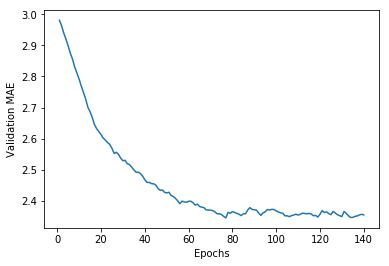

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history=smooth_curve(np_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [14]:
model=build_model()
model.fit(train_data,train_targets, epochs=80, batch_size=16)
test_mse_score, test_mae_score= model.evaluate(test_data,test_targets)

Epoch 1/80
404/404 [==============================] - 0s 904us/step - loss: 493.0824 - mean_absolute_error: 20.0670
Epoch 2/80
404/404 [==============================] - 0s 151us/step - loss: 315.7668 - mean_absolute_error: 15.2024
Epoch 3/80
404/404 [==============================] - 0s 154us/step - loss: 161.9664 - mean_absolute_error: 10.0224
Epoch 4/80
404/404 [==============================] - 0s 173us/step - loss: 79.1711 - mean_absolute_error: 6.6876
Epoch 5/80
404/404 [==============================] - 0s 161us/step - loss: 48.6488 - mean_absolute_error: 5.0459
Epoch 6/80
404/404 [==============================] - 0s 141us/step - loss: 32.6325 - mean_absolute_error: 4.0919
Epoch 7/80
404/404 [==============================] - 0s 139us/step - loss: 25.6106 - mean_absolute_error: 3.4948
Epoch 8/80
404/404 [==============================] - 0s 136us/step - loss: 22.4522 - mean_absolute_error: 3.3102
Epoch 9/80
404/404 [==============================] - 0s 131us/step - loss: 20.295

404/404 [==============================] - 0s 166us/step - loss: 6.5055 - mean_absolute_error: 1.8131
Epoch 73/80
404/404 [==============================] - 0s 168us/step - loss: 6.1497 - mean_absolute_error: 1.7480
Epoch 74/80
404/404 [==============================] - 0s 166us/step - loss: 6.2394 - mean_absolute_error: 1.7719
Epoch 75/80
404/404 [==============================] - 0s 164us/step - loss: 6.1128 - mean_absolute_error: 1.7594
Epoch 76/80
404/404 [==============================] - 0s 176us/step - loss: 6.2413 - mean_absolute_error: 1.7713
Epoch 77/80
404/404 [==============================] - 0s 166us/step - loss: 5.8296 - mean_absolute_error: 1.7180
Epoch 78/80
404/404 [==============================] - 0s 164us/step - loss: 6.0918 - mean_absolute_error: 1.7351
Epoch 79/80
404/404 [==============================] - 0s 151us/step - loss: 6.0358 - mean_absolute_error: 1.7518
Epoch 80/80
102/102 [==============================] - 0s 1ms/step


In [15]:
test_mae_score

2.815710638083664